In [1]:
# from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
from pyzbar import pyzbar
import cv2
import pytesseract
from PIL import Image
import os
import cv2
import numpy as np
import imutils
import pdf2image
from dbr import DynamsoftBarcodeReader
import re
from matplotlib import pyplot as plt

In [2]:
os.chdir('/Users/kunal/Documents/VdartWorking/realFake/')

In [3]:
MAINIMAGEFILEJPG = '/Users/kunal/Documents/VdartWorking/realFake/Document.jpg'
MAINIMAGEFILEPNG = '/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG'
MAINPDFFILE = '/Users/kunal/Documents/VdartWorking/realFake/Genuine.pdf'

# Display the Image

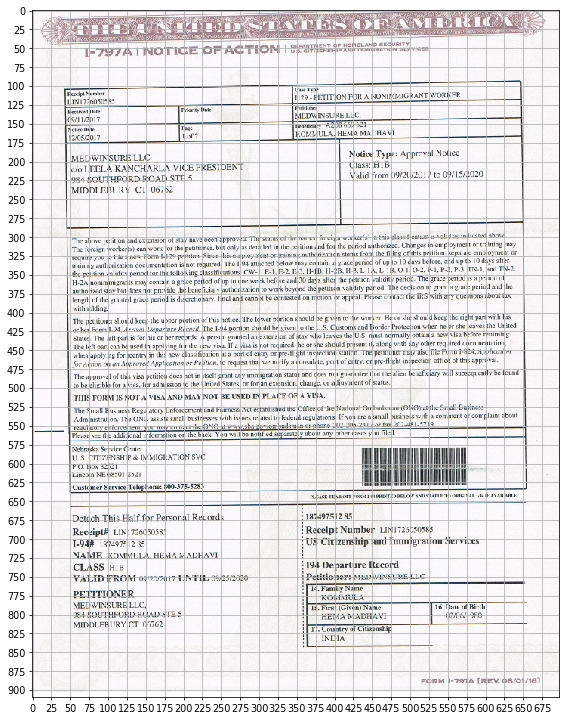

In [4]:
file = '/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG'
image = Image.open(file)
imageCV = cv2.imread(file)
my_dpi=70. # size of the axis (the text size)
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)
myxInterval=25. #the interval for the X axis
myyInterval=25. #the interval for the Y axis
locx = plticker.MultipleLocator(base=myxInterval)
locy = plticker.MultipleLocator(base=myyInterval)
ax.xaxis.set_major_locator(locx)
ax.yaxis.set_major_locator(locy)
# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)
# Save the figure
fig.savefig('myImageGrid.png',dpi=my_dpi)

# Barcode

In [5]:
def checkEqual1(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == rest for rest in iterator)

In [6]:
def getText(result, partText):
    endindex = result + 80
    partialdetected = text[result:endindex]
    endindex = partialdetected.find("\n")
    fulldetected = partialdetected[:endindex]
    startindex = fulldetected.find(partText)#'er'
    barcodeNumberdetectedname = fulldetected[startindex+3:28]
    return barcodeNumberdetectedname

In [7]:
#t0068MgAAACk+RNudXWjI8IqSZ6cPB04DUpOUhqTHb7YTFYTgM+nuTsx92c7RDeCS6o417Oo6MKjRUn0LnCMqfxz8JHqN74w=

In [16]:
barcodeArray = []
dbr = DynamsoftBarcodeReader()
dbr.initLicense('t0068MgAAACk+RNudXWjI8IqSZ6cPB04DUpOUhqTHb7YTFYTgM+nuTsx92c7RDeCS6o417Oo6MKjRUn0LnCMqfxz8JHqN74w=') # https://www.dynamsoft.com/CustomerPortal/Portal/Triallicense.aspx
results = dbr.DecodeFile('/Users/kunal/Documents/VdartWorking/realFake/Genuine.pdf')
textResults = results["TextResults"]
for textResult in textResults:
    print(textResult["BarcodeText"])
    barcodeArray.append(textResult["BarcodeText"])

LIN1726050585
LIN1726050585
LIN1726050585


In [17]:
if len(barcodeArray) == 0:
    print("NO BARCODE DETECTED!!!!")
    barcodeDetected = "N/A"
elif len(barcodeArray) == 1:
    barcodeDetected = barcodeArray[0]
elif len(barcodeArray) > 1:
    working = checkEqual1(barcodeArray)
    if working:
        barcodeDetected = barcodeArray[0]
    else:
        barcodeDetected = "N/A"

In [18]:
thing = MAINIMAGEFILEJPG 

In [19]:
OCRPIC = thing
value=Image.open(OCRPIC)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(value, config='')

In [20]:
result = text.find('Receipt') 
result2  = text.find('Receipt Number')
result1Final = getText(result,'pt')
result2Final = getText(result2, 'er')

In [21]:
samevalue = False
if result1Final != result2Final:
    if len(result1Final) == len(result2Final):
        difference = []
        for i in range(len(result1Final)):
            if result1Final[i] != result2Final[i]:
                difference.append(i)
        if len(difference) == 1:
            differencePoint = difference[0]
        else:
            print("Multiple Differences")
        if (((result1Final[differencePoint] == '1') or (result2Final[differencePoint] == 'I')) or((result1Final[differencePoint] == 'I') or (result1Final[differencePoint] == '1'))):
            print("Error between '1' and 'I' at position 1")
            print(result1Final)
            print(result2Final)
        else:
            print("I DONT KNOW")
    else:
        print("There is a difference in length -- ERROR")
else:
    print("The Output is the same")
    samevalue = True

Error between '1' and 'I' at position 1
LIN1726050585
L1N1726050585


In [22]:
result1Final = result1Final.strip()
result2Final = result2Final.strip()
barcodeDetected = barcodeDetected.strip()

In [23]:
if samevalue:
    print("The barcode decoded is", barcodeDetected)
    print("The text for barcode detected is", result1Final)
    if (result1Final == barcodeDetected):
        print("EQUAL")
    else:
        print("NOT EQUAL")
else:
    print("The barcode decoded is", barcodeDetected)
    print("The text for barcode detected is", result1Final, " and ", result2Final)
    if (result1Final == barcodeDetected):
        print("EQUAL -- First one is correct")
        equal = True
    if (result2Final == barcodeDetected):
        print("EQUAL -- Second is correct")
        equal = True
    if not equal:
        if (result1Final != barcodeDetected) or (result2Final != barcodeDetected):
            print("NOT EQUAL")

The barcode decoded is LIN1726050585
The text for barcode detected is LIN1726050585  and  L1N1726050585
EQUAL -- First one is correct


# DATE DETECTION

In [24]:
result = text.find('Valid from') 
big = text[result:result+35]

In [25]:
start = big.find("from")
startstr = big[start+5:start+15]
end = big.find("to")
endstr = big[end+3:end+13]


In [26]:
start = startstr.split("/")
end = endstr.split("/")

In [27]:
work = False
reason = ""
if ((len(start) == 3) and (len(end) == 3)):    
    if(start[2] > end[2]):
        work = False
        reason = "Year is before the starting one"
    if(start[2] == end[2]):
        if(end[0] < start[0]):
            work = False
            reason = "Month Doesn't Work"
        if(end[0] > start[0]):
            work = True
            reason = "Month Works"
        if(end[0] == start[0]):
            if(end[1] < start[1]):
                work = False
                reason = "Day Doesn't Work"
            if(end[1] > start[1]):
                work = True
                reason = "Day Works"
            if(end[1] == start[1]):
                work = False
                reason = "Date Same"
    if(start[2] < end[2]):
        work = True
        reason = "Year Works"
    if(int(start[1]) > 31 or int(end[1]) > 31 or int(start[0]) > 12 or int(end[0]) > 12):
        work = False
        reason = "Date out of bounds"
else:
    work = False
    reason = "The array is wrong"


In [28]:
print("The Date ", work, " becuase ", reason)

The Date  True  becuase  Year Works


# Title Compare

In [44]:
RUNNING = cv2.imread(MAINIMAGEFILEPNG)
titleimgCV = RUNNING[0:50, 10:650]
titleNum = Image.fromarray(titleimgCV)
titleNum.save("Title.png")

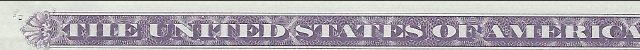

In [45]:
titleNum

In [46]:
compareFile = imageCV[0:50, 10:650]
COMPAREIMG = Image.fromarray(compareFile)
COMPAREIMG.save("COMPARINGIMAGE.png")

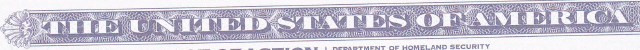

In [47]:
COMPAREIMG

In [48]:
original = cv2.imread("/Users/kunal/Documents/VdartWorking/realFake/Title.png")
duplicate = cv2.imread("/Users/kunal/Documents/VdartWorking/realFake/COMPARINGIMAGE.png")

In [49]:
threshold = 50

In [50]:
if original.shape == duplicate.shape:
    print("The images have same size and channels")
    difference = cv2.subtract(original, duplicate)
    b, g, r = cv2.split(difference)
    if cv2.countNonZero(b) <= threshold and cv2.countNonZero(g) <= threshold and cv2.countNonZero(r) <= threshold:
        print("The images are completely Equal")

The images have same size and channels


In [59]:
x,y = b.shape
size = x*y
countb = 0
for startthing1 in b:
    for endthomg1 in i:
        if endthomg1 > 50:
            countb+=1
countg = 0
for startthing2 in g:
    for endthomg2 in i:
        if endthomg2 > 50:
            countg+=1
countr = 0
for startthing3 in r:
    for endthomg3 in i:
        if endthomg3 > 50:
            countr+=1
PERCENT_BLUE_DIFFERENCE_TITLE = countb/size*100
PERCENT_GREEN_DIFFERENCE_TITLE = countg/size*100
PERCENT_RED_DIFFERENCE_TITLE = countr/size*100
print(countb, " ", countg, " ", countr)
print(PERCENT_BLUE_DIFFERENCE_TITLE, " ", PERCENT_GREEN_DIFFERENCE_TITLE, " ", PERCENT_RED_DIFFERENCE_TITLE)

5850   5850   5850
18.28125   18.28125   18.28125


# Text

In [ ]:
OCRPIC = thing
value=Image.open(OCRPIC)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(value, config='')